In [1]:
%matplotlib inline 
#jupyter notebook 中的魔法函数，如果不是使用该软件请使用plt.show()用于显示图像
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord,"aesthetics")))

In [46]:
import pandas as pd

In [47]:
df = pd.read_csv(u'C:\\Users\\Wang\\Desktop\\CWB hourly taipei\\Station_City20180705112113.txt',sep=",")

In [48]:
df.head()

,Stno,Datatime,PP01,PS01,RH01,TX01,WD01,WD02,Unnamed: 8
0,466920,1897/1/1 AM 01:00:00,0.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,NaN
1,466920,1897/1/1 AM 02:00:00,0.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,NaN
2,466920,1897/1/1 AM 03:00:00,0.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,NaN
3,466920,1897/1/1 AM 04:00:00,0.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,NaN
4,466920,1897/1/1 AM 05:00:00,0.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,NaN


In [62]:
Data = df['Datatime'].values
Data 

array(['1897/1/1 AM 01:00:00', '1897/1/1 AM 02:00:00',
       '1897/1/1 AM 03:00:00', ..., '2018/3/31 PM 10:00:00',
       '2018/3/31 PM 11:00:00', '2018/4/1 AM 12:00:00'], dtype=object)

In [181]:
ordata = []
ccc = 0
for ch in Data:
    ch1 = ch.split('/')
    year = int(ch1[0])
    month = int(ch1[1])
    ch2 = ch1[2].split()
    day = int(ch2[0])
    ch3 = ch2[2].split(':')
    #「午前」(A.M., ante meridiem)及「午後」(P.M., post meridiem)這兩個詞在形容「正午」及「午夜」時可能會造成混淆。
    #另外，使用十二小時制的系統通常將「正午」以「12:00 p.m.」表示，
    #而「午夜」為則被標為「12:00 a.m.」
    hour1 = int(ch3[0])
    if ch2[1] == 'PM' and (hour1 != 12):
        hr = int(ch3[0]) + 12
    elif ch2[1] == 'AM' and hour1 == 12:
        hr = 24
    else:
        hr = ch3[0]
    #print hr   
    
    ccc = ccc + 1
    if year == 2018 and month == 2 and day == 1:
        #print year,month,day,df.iloc[ccc,7]
        WD02 = df.iloc[ccc,7]
        #print WD02
        #ordata.append(df.iloc[ccc,0])
    

In [118]:
Stno = []
Datatime = []
PP01 = []
PS01 = []
RH01 = []
TX01 = []
WD01 = []
WD02 = []
ordata = []
ccc = 0
#將時間時欄位一筆一筆讀入後，用特殊符號(('/')斜線、()空格、(':')冒號)進行字串切割
for ch in Data:
    ch1 = ch.split('/')
    year = int(ch1[0])
    month = int(ch1[1])
    ch2 = ch1[2].split()
    day = int(ch2[0])
    ch3 = ch2[2].split(':')
    #「午前」(A.M., ante meridiem)及「午後」(P.M., post meridiem)這兩個詞在形容「正午」及「午夜」時可能會造成混淆。
    #另外，使用十二小時制的系統通常將「正午」以「12:00 p.m.」表示，
    #而「午夜」為則被標為「12:00 a.m.」
    hour1 = int(ch3[0])
    if ch2[1] == 'PM' and (hour1 != 12):
        hr = int(ch3[0]) + 12
    elif ch2[1] == 'AM' and hour1 == 12:
        hr = 24
    else:
        hr = ch3[0]
    #print hr   
    
    #將2018年2月1日的風向風速資料取出
    ccc = ccc + 1
    if year == 2018 and month == 2 and day == 1:
        #print year,month,day,df.iloc[ccc,7]
        WD01.append(df.iloc[ccc,6])
        WD02.append(df.iloc[ccc,7])
        #print WD02
        #ordata.append(df.iloc[ccc,0])
    

In [119]:
WD01

[2.3999999999999999,
 3.0,
 1.3,
 2.6000000000000001,
 0.59999999999999998,
 2.3999999999999999,
 1.1000000000000001,
 1.3999999999999999,
 0.40000000000000002,
 1.6000000000000001,
 0.80000000000000004,
 1.1000000000000001,
 2.0,
 2.2000000000000002,
 2.0,
 2.6000000000000001,
 1.8999999999999999,
 3.6000000000000001,
 2.5,
 3.0,
 3.7000000000000002,
 2.8999999999999999,
 2.2000000000000002,
 1.7]

In [120]:
WD02

[10.0,
 360.0,
 90.0,
 50.0,
 130.0,
 20.0,
 220.0,
 180.0,
 190.0,
 210.0,
 220.0,
 200.0,
 110.0,
 90.0,
 60.0,
 60.0,
 80.0,
 60.0,
 50.0,
 50.0,
 50.0,
 50.0,
 60.0,
 60.0]

#給予假的經緯度座標進行繪圖

In [126]:
lon = [122.0797,121.6133,121.0475,121.8574,121.7565,118.2893,119.6675,119.5631,120.2048
,120.2367,120.3157,120.4329,
120.6841,
120.8132,
120.9038,
120.9595,
121.0142,
120.7463,
121.3734,
121.5583,
120.9081,
121.1546,
120.5234,
120.808,
 ]
lat = [25.628,
23.9751,
25.0067,
24.5967,
24.764,
24.4073,
23.257,
23.5655,
22.9932,
23.0384,
22.566,
23.4959,
24.1457,
23.5082,
22.3557,
23.4876,
24.8279,
22.0039,
23.0975,
22.037,
23.8813,
22.7522,
24.256,
21.9482,
]
dfnb = pd.DataFrame({'WD01' : WD01,
                     'WD02' : WD02,
                     'lon'  : lon,
                     'lat'  : lat
                    })

In [127]:
dfnb

,WD01,WD02,lat,lon
0,2.4,10.0,25.6280,122.0797
1,3.0,360.0,23.9751,121.6133
2,1.3,90.0,25.0067,121.0475
3,2.6,50.0,24.5967,121.8574
4,0.6,130.0,24.7640,121.7565
5,2.4,20.0,24.4073,118.2893
6,1.1,220.0,23.2570,119.6675
7,1.4,180.0,23.5655,119.5631
8,0.4,190.0,22.9932,120.2048
9,1.6,210.0,23.0384,120.2367


(22,
 5,
 [116.70999908447266, 20.697500228881836, 0.0, 0.0],
 [122.10847473144545, 26.385419845581104, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x36532cc0>)

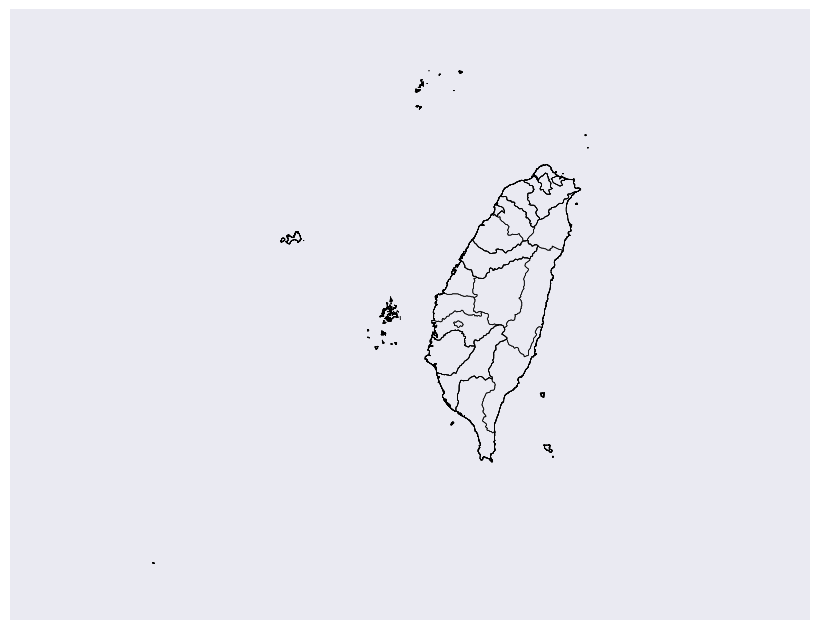

In [141]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8),dpi=100)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])
ax1.m = Basemap(llcrnrlon=115, llcrnrlat=20, urcrnrlon=125, urcrnrlat=27, projection='lcc', lat_1=20, lat_2=35, lon_0=120)
#ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm1', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm2', 'taiwan', drawbounds=True, color='black')

#將風向風速轉成UV

In [143]:
import math
U = []
V = []
for i in range(len(WD01)):
    U.append(WD01[i]*math.cos(270-WD02[i]))
    V.append(WD01[i]*math.sin(270-WD02[i]))

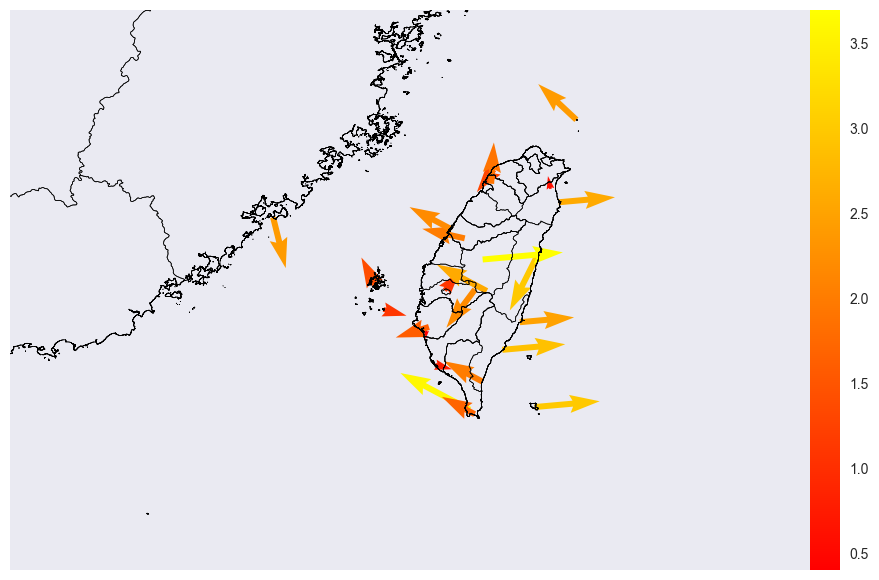

In [190]:
fig = plt.figure(figsize=(10,8),dpi=100)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])

ax1.m = Basemap(llcrnrlon=115, llcrnrlat=20, urcrnrlon=125, urcrnrlat=27, projection='cyl', lat_1=20, lat_2=35, lon_0=120,resolution='h')
#ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm1', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm2', 'taiwan', drawbounds=True, color='black')
#ax1.m.etopo()
ax1.m.quiver(lon, lat, U, V, WD01, cmap=plt.cm.autumn,latlon=True)
#plt.colorbar(cax = cbaxes, orientation='vertical')
# Now adding the colorbar
# 嵌套方法一
# figure的百分比, 从figure 20%的位置开始绘制, 宽高是figure的25%
#left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
# 获得绘制的句柄
#ax2 = fig.add_axes([left, bottom, width, height])
cbaxes = fig.add_axes([0.9, 0.15, 0.03, 0.7]) 
#cb =plt.colorbar(ax1, cax = cbaxes, orientation='vertical') 
plt.colorbar(cax = cbaxes, orientation='vertical')
plt.show()

(<matplotlib.quiver.Barbs at 0x3cb1a7b8>,
 <matplotlib.quiver.Barbs at 0x3887b828>)

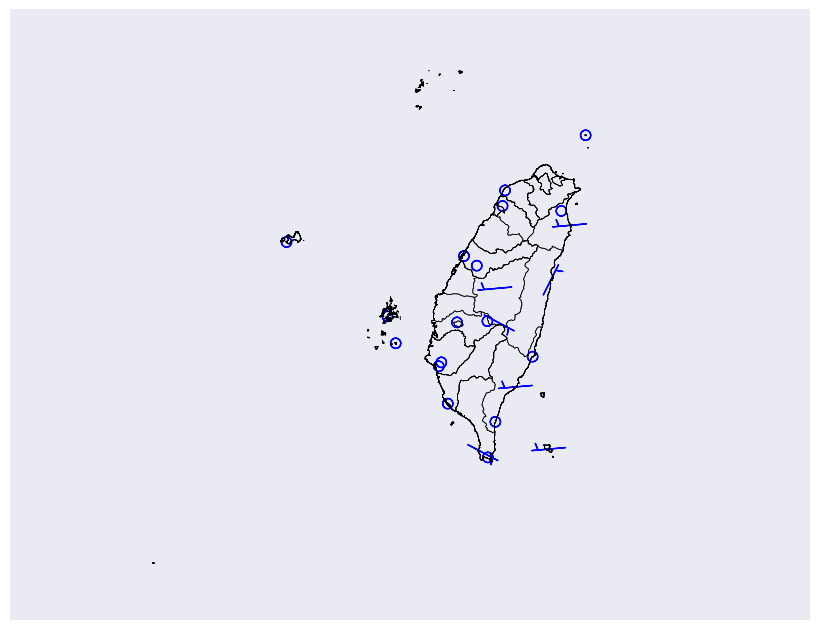

In [171]:
fig = plt.figure(figsize=(10,8),dpi=100)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])
ax1.m = Basemap(llcrnrlon=115, llcrnrlat=20, urcrnrlon=125, urcrnrlat=27, projection='lcc', lat_1=20, lat_2=35, lon_0=120)
#ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm1', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm2', 'taiwan', drawbounds=True, color='black')
ax1.m.barbs(lon, lat, U, V, 
    pivot='middle', barbcolor='b',latlon=True)